### This Project Created by Naufal Rezky Ananda

### Project Overview

The aim of this projects is to introduce you to data visualization with Python as concrete
and as consistent as possible. Using what you’ve learned; download the London Crime
Dataset from Kaggle. This dataset is a record of crime in major metropolitan areas, such
as London, occurs in distinct patterns. This data covers the number of criminal reports by
month, LSOA borough, and major/minor category from Jan 2008-Dec 2016.

### Import Library and Inputing Data

In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt

print(plt.style.available)
mpl.style.use(['ggplot'])

In C:\Users\naufa\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\naufa\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\naufa\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\naufa\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\naufa\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

['Solarize_Light2', '_classic_test', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [2]:
# Inputing Data
df = pd.read_csv("london_crime_by_lsoa.csv")

In [3]:
df.head() # Menampilkan 5 data teratas

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


### EDA

This Dataset Contain:
- lsoa_code: code for Lower Super Output Area in Greater London.
- borough: Common name for London borough.
- major_category: High level categorization of crime
- minor_category: Low level categorization of crime within major category.
- value: monthly reported count of categorical crime in given borough
- year: Year of reported counts, 2008-2016
- month: Month of reported counts, 1-12

In [4]:
# Melihat tipe data dari tiap2 variabel
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
lsoa_code         object
borough           object
major_category    object
minor_category    object
value             int64
year              int64
month             int64
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [5]:
#melihat ukuran dimensi dari data
df.shape

(13490604, 7)

In [6]:
## Looping for know unique value each column
for col in df.columns:
    print("Column:",col)
    print(df[col].unique())

Column: lsoa_code
['E01001116' 'E01001646' 'E01000677' ... 'E01001562' 'E01002598'
 'E01001111']
Column: borough
['Croydon' 'Greenwich' 'Bromley' 'Redbridge' 'Wandsworth' 'Ealing'
 'Hounslow' 'Newham' 'Sutton' 'Haringey' 'Lambeth' 'Richmond upon Thames'
 'Hillingdon' 'Havering' 'Barking and Dagenham' 'Kingston upon Thames'
 'Westminster' 'Hackney' 'Enfield' 'Harrow' 'Lewisham' 'Brent' 'Southwark'
 'Barnet' 'Waltham Forest' 'Camden' 'Bexley' 'Kensington and Chelsea'
 'Islington' 'Tower Hamlets' 'Hammersmith and Fulham' 'Merton'
 'City of London']
Column: major_category
['Burglary' 'Violence Against the Person' 'Robbery' 'Theft and Handling'
 'Criminal Damage' 'Drugs' 'Fraud or Forgery' 'Other Notifiable Offences'
 'Sexual Offences']
Column: minor_category
['Burglary in Other Buildings' 'Other violence' 'Personal Property'
 'Other Theft' 'Offensive Weapon' 'Criminal Damage To Other Building'
 'Theft/Taking of Pedal Cycle' 'Motor Vehicle Interference & Tampering'
 'Theft/Taking Of Motor V

In [7]:
# To check missing Value
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [8]:
# To check unexpected value
df.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


### Area Plot

In [9]:
# Melakukan grouping dengan kolom borough lalu year untuk memudahkan visualisasi
sumsandyear=df.groupby(['borough','year']).sum() 

In [10]:
# Reset Index 
sumsandyear.reset_index(inplace=True)

In [11]:
#melakukan pivot untuk mentranspose kolom borough
pivoted = sumsandyear.pivot(index='year', columns='borough', values='value')
pivoted.columns.name=None

In [12]:
pivoted

,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
year,,,,,,,,,,,,,,,,,,,,,
2008,17656,23944,15305,23504,24015,32010,0,29516,28947,21980,...,13875,29752,20873,11106,33470,12943,23578,24080,23330,47846
2009,17713,23449,14445,24748,21858,31612,0,29784,28617,21147,...,13561,28610,20837,10618,30623,12240,21959,24761,23021,48456
2010,17130,23416,13166,25512,19572,31804,0,29373,31360,20808,...,13595,30728,20652,10601,31320,12032,23072,24818,22815,48116
2011,16686,24007,11325,27669,19868,33956,69,29830,29537,21041,...,13548,27978,21994,10896,30723,11068,24712,23714,21384,54243
2012,15990,23573,11669,26357,19622,31472,157,30189,28832,21069,...,12856,30067,21424,11168,30737,10948,26784,22647,24457,59226
2013,15759,22510,11552,23759,18945,28435,110,27444,25917,21574,...,11595,27577,19793,10439,31128,10057,26258,21903,22290,53852
2014,15426,22572,11844,24426,19668,27198,115,27357,24978,21700,...,11596,28005,19590,10456,28912,10443,25504,20271,21364,47564
2015,16346,24036,11990,24883,20637,29477,151,28089,26247,22076,...,12273,29217,18897,10413,30260,10598,27493,20969,22401,47395
2016,16741,24684,12840,26693,20164,29183,178,28712,27127,22485,...,12755,30090,19502,11074,31636,10658,29253,20716,23679,48330


In [13]:
# Melakukan slicing dengan cuma mengambil 5 daerah dengan kasus terbanyak.
df_CI = pivoted[['Westminster','Lambeth','Southwark','Camden','Newham']]

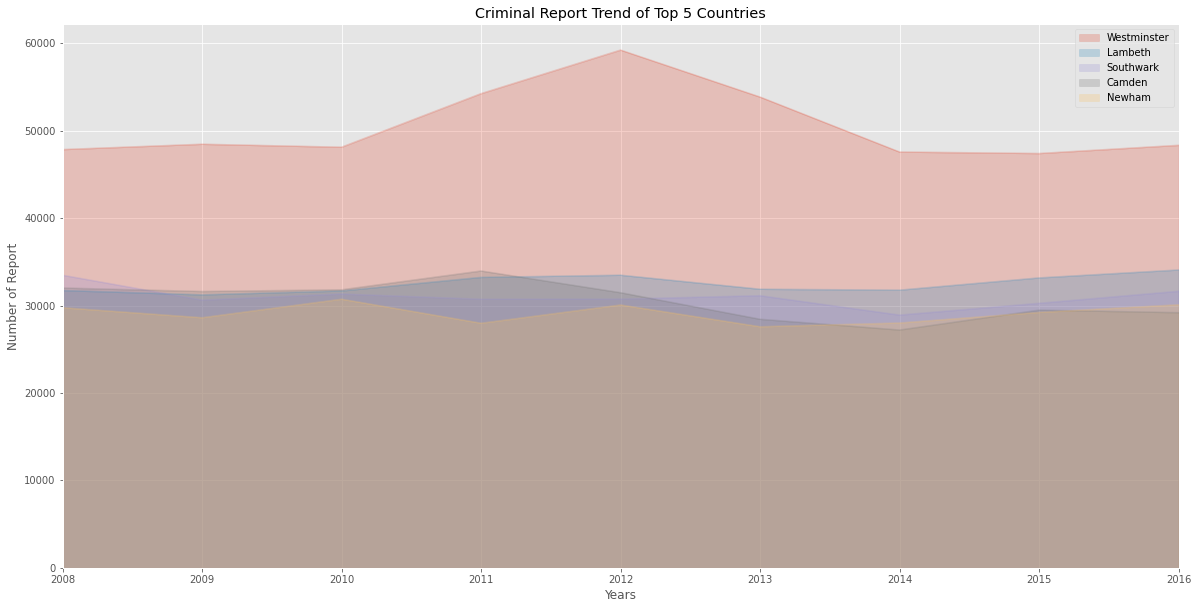

In [14]:
#Membuat Area Plot
df_CI.plot(kind='area', 
             alpha=0.25, # 0-1, default value a= 0.5
             stacked=False,
             figsize=(20, 10),
            )

plt.title('Criminal Report Trend of Top 5 Countries')
plt.ylabel('Number of Report')
plt.xlabel('Years')

plt.show()

Bagaimana keadaan tahun ke tahun report kriminal di 3 daerah dengan report terbanyak?

Dari Area plot diatas dapat kita amati bahwa dari tahun ke tahun kasus criminal di daerah (jumlah report terbanyak) stabil. Ini berarti Perbedaan kasus kriminal tahun ke tahun itu tidak terlalu berubah. Weistminster memiliki kasus criminal terbanyak dengan kasus terbanyak yang melonjak tinggi di tahun 2012 yang naik sekitar 20% dari tahun sebelumnya. Sedangkan untuk daerah Lambeth, Southwark, Camden, dan NewHam memiliki kasus kriminal yang lebih stabil tidak ada perubahan yg signifikan dari tahun ke tahun.

### Histogram

In [15]:
pivoted

,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
year,,,,,,,,,,,,,,,,,,,,,
2008,17656,23944,15305,23504,24015,32010,0,29516,28947,21980,...,13875,29752,20873,11106,33470,12943,23578,24080,23330,47846
2009,17713,23449,14445,24748,21858,31612,0,29784,28617,21147,...,13561,28610,20837,10618,30623,12240,21959,24761,23021,48456
2010,17130,23416,13166,25512,19572,31804,0,29373,31360,20808,...,13595,30728,20652,10601,31320,12032,23072,24818,22815,48116
2011,16686,24007,11325,27669,19868,33956,69,29830,29537,21041,...,13548,27978,21994,10896,30723,11068,24712,23714,21384,54243
2012,15990,23573,11669,26357,19622,31472,157,30189,28832,21069,...,12856,30067,21424,11168,30737,10948,26784,22647,24457,59226
2013,15759,22510,11552,23759,18945,28435,110,27444,25917,21574,...,11595,27577,19793,10439,31128,10057,26258,21903,22290,53852
2014,15426,22572,11844,24426,19668,27198,115,27357,24978,21700,...,11596,28005,19590,10456,28912,10443,25504,20271,21364,47564
2015,16346,24036,11990,24883,20637,29477,151,28089,26247,22076,...,12273,29217,18897,10413,30260,10598,27493,20969,22401,47395
2016,16741,24684,12840,26693,20164,29183,178,28712,27127,22485,...,12755,30090,19502,11074,31636,10658,29253,20716,23679,48330


In [16]:
# Melakukan Slicing untuk visualisasi 3 daerah dengan kasus terbanyak
df_cof = pivoted[['Westminster', 'Lambeth', 'Southwark']]
df_cof 

,Westminster,Lambeth,Southwark
year,,,
2008,47846,31717,33470
2009,48456,31225,30623
2010,48116,31671,31320
2011,54243,33224,30723
2012,59226,33473,30737
2013,53852,31868,31128
2014,47564,31765,28912
2015,47395,33164,30260
2016,48330,34071,31636


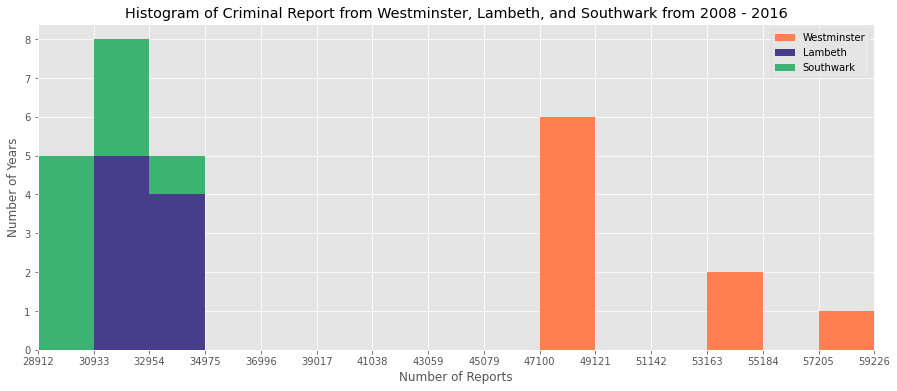

In [17]:
#Membuat Stacked Histogram

count, bin_edges = np.histogram(df_cof, 15)
xmin = bin_edges[0] - 10   #  first bin value is 31.0, adding buffer of 10 for aesthetic purposes 
xmax = bin_edges[-1] + 10  #  last bin value is 308.0, adding buffer of 10 for aesthetic purposes

# stacked Histogram
df_cof.plot(kind='hist',
          figsize=(15, 6), 
          bins=15,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          stacked=True,
          xlim=(xmin, xmax)
         )

plt.title('Histogram of Criminal Report from Westminster, Lambeth, and Southwark from 2008 - 2016')
plt.ylabel('Number of Years')
plt.xlabel('Number of Reports') 

plt.show()

Bagimana perbandingan 3 daerah dengan report criminal terbanyak di London?

Pada Histogram diatas dapat kita lihat bahwa distribusi tindak kriminal di daerah Westminster adalah yang terbanyak dan termasuk kasus yang beda jauh dengan kota lainnya. Lalu untuk daerah Lambeth dan Southwark jumlah kasus yang terjadi hampir sama.

### Bar Chart

In [18]:
# Grouping untuk minor_category
sum_minor = df.groupby(['minor_category']).sum()

In [19]:
# Mendrop kolom yang tidak diperlukan untuk visualisasi bar chart
sum_minor.drop(columns=['year','month'], inplace=True)

In [20]:
# Sorting 
sum_minor.sort_values(by='value', inplace=True)

In [21]:
# Menampilkan 5 data teratas
sum_minor.head()

,value
minor_category,
Rape,268
Murder,949
Other Sexual,1005
Other Fraud & Forgery,1485
Other Drugs,2998


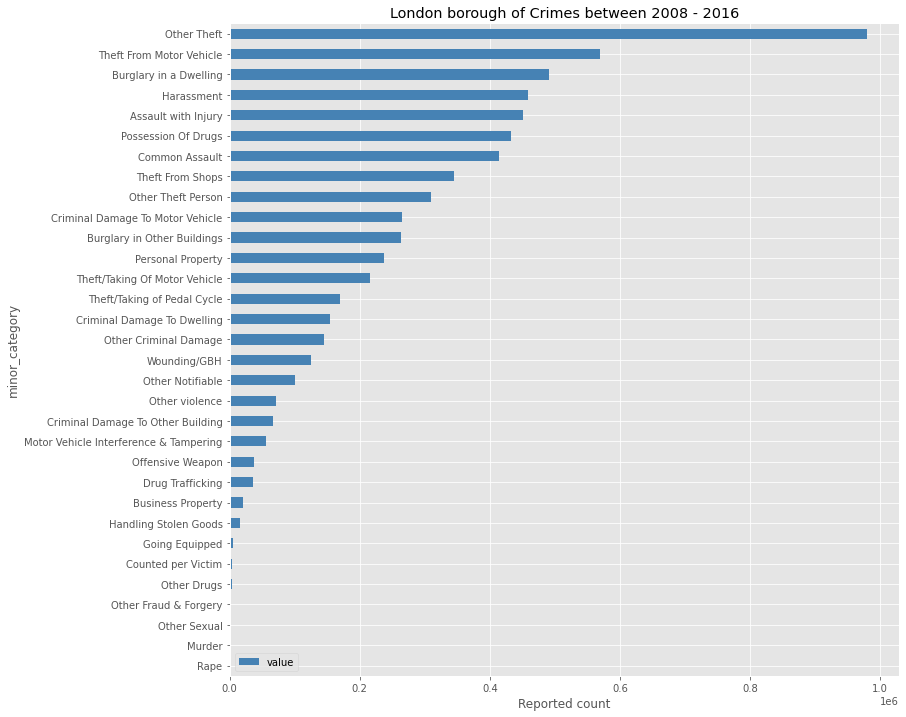

In [22]:
# Membuat horizontal bar chart
sum_minor.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Reported count')
plt.title('London borough of Crimes between 2008 - 2016')
# for index, value in enumerate(df_top15): 
#     label = format(int(value), ',') # format int with commas
#     # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
#     plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')
plt.show()

Apa kasus kriminal yang paling jarang terjadi per daerah di kota London?

Pada Horizontal Bar chart diatas dapat kita lihat bahwa tindakan criminal di London yang paling jarang dilakukan adalah Theft from Motorcycle, Burglary in dwelling, dan Harassment. Dan yang kasus yang paling jarang terjadi di daerah London adalah kasus kejahatan yang dilaporkan dan tidak termasuk ke kategori kejahatan diatas

### Pie Chart

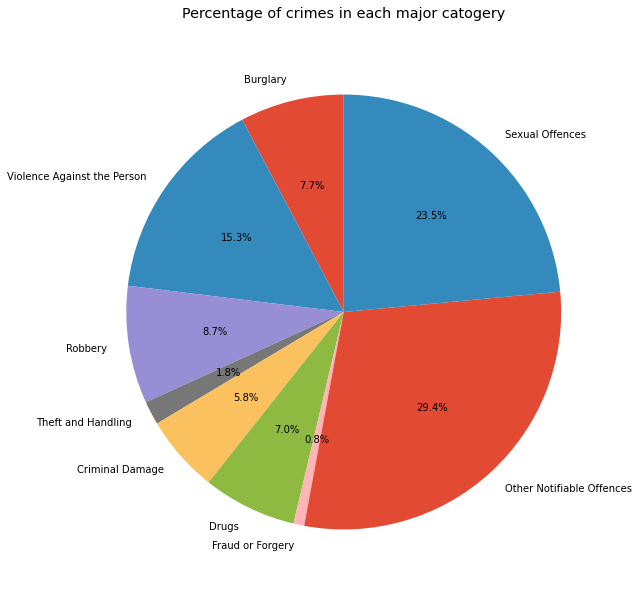

In [23]:
# Mengambil unique value dari major_category untuk label pie chart
lables=df['major_category'].unique()

# Membuat Pie chart
sizes=df.groupby(['major_category']).size()
plt.figure(figsize=(20,10))
ax = plt.axes()
plt.title('Percentage of crimes in each major catogery\n')
plt.pie(sizes, labels=lables, startangle=90,autopct='%1.1f%%')
plt.show()

Apa category kejahatan yang paling sering terjadi di kota London?

Pada gambar pie chart di atas kita dapat langsung menyimpulkan bahwa kasus kejahatan yang paling sering terjadi di kota London adalah Sexual Offence, Violence against the person, and Robbery. Dan yang paling tinggi adalah kasus kejahatan yang dilaporkan dan tidak termasuk ke kategori kejahatan diatas

### Box Plot

In [24]:
# Grouping
sum_major = df.groupby(['major_category','year']).sum()

In [25]:
# drop kolom yang tidak digunakan di visualisasi box plot
sum_major.drop(columns=['month'], inplace=True)

In [26]:
#sorting
sum_major.sort_values(by='value', inplace=True)

In [27]:
# reset index
sum_major.reset_index(inplace=True)

In [28]:
# pivot untuk mentranspose kolom major category
sum_major = sum_major.pivot(index='year', columns='major_category', values='value')
sum_major.columns.name=None

In [29]:
sum_major

,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
year,,,,,,,,,
2008,88092,91872,68804,5325,10112,29627,1273,283692,159844
2009,90619,85565,60549,0,10644,29568,0,279492,160777
2010,86826,77897,58674,0,10768,32341,0,290924,157894
2011,93315,70914,57550,0,10264,36679,0,309292,146901
2012,93392,62158,51776,0,10675,35260,0,334054,150014
2013,87222,56206,50278,0,10811,29337,0,306372,146181
2014,76053,59279,44435,0,13037,22150,0,279880,185349
2015,70489,62976,39785,0,14229,21383,0,284022,218740
2016,68285,64071,38914,0,15809,22528,0,294133,232381


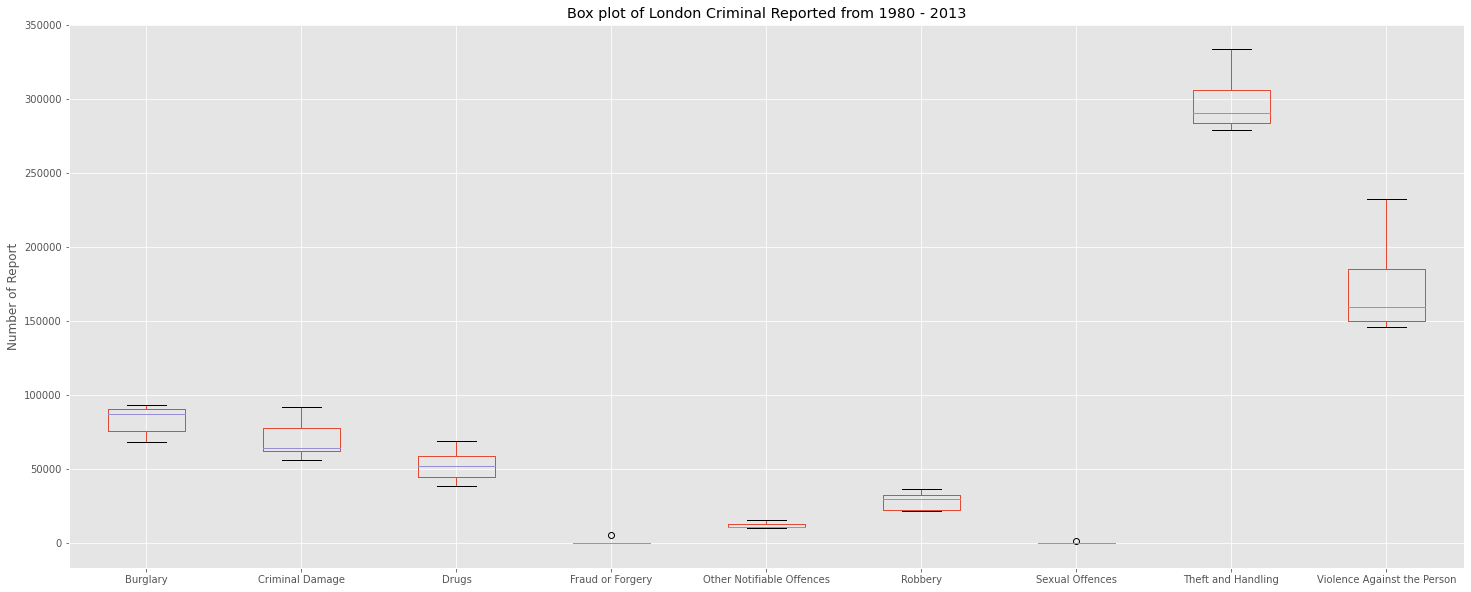

In [30]:
# Membuat box plot
sum_major.plot(kind='box', figsize=(25, 10))

plt.title('Box plot of London Criminal Reported from 1980 - 2013')
plt.ylabel('Number of Report')

plt.show()

Bagaimana distribusi kategori criminal di setiap daerah di London?

Pada Box plot diatas dapat kita lihat bahwa kasus terbanyak adalah Theft and Healing. Dan diikuti oleh kasus Violence Against the Person. Dengan skewness nya kebawah. 2 Kategor kriminal ini memiliki report yang jauh lebih banyak dari kasus yang lainnya

### Scatter Plot

In [31]:
# copy df agar dataframe df tidak berubah
df_scatter = df.copy()

In [32]:
# Inisialisai day ke 1 agar bisa dijadiin tipe datetime
df_scatter['day'] = 1

In [33]:
# menggabungkan year,month, dan day menjadi satu variabel
df_scatter["date"] = pd.to_datetime(df_scatter[["year","month","day"]])
df_scatter.head()

,lsoa_code,borough,major_category,minor_category,value,year,month,day,date
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11,1,2016-11-01
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11,1,2016-11-01
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5,1,2015-05-01
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3,1,2016-03-01
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6,1,2008-06-01


In [34]:
# drop kolom yang tidak digunakan di visualisasi scatter plot
df_scatter.drop(columns=['year','month','day','lsoa_code'],inplace=True)

In [35]:
df_scatter.head() # Menampilkan 5 data teratas

,borough,major_category,minor_category,value,date
0,Croydon,Burglary,Burglary in Other Buildings,0,2016-11-01
1,Greenwich,Violence Against the Person,Other violence,0,2016-11-01
2,Bromley,Violence Against the Person,Other violence,0,2015-05-01
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016-03-01
4,Wandsworth,Robbery,Personal Property,0,2008-06-01


In [36]:
# Mengambil daerah Westminster karena memiliki kasus terbanyak
df_scatter = df_scatter.loc[df['borough']=='Westminster']

In [37]:
# Sorting
df_scatter.sort_values('date', inplace=True)

In [38]:
# Grouping date agar tidak ada data date duplicate
df_scatter = df_scatter.groupby(by='date').sum()

In [39]:
# reset index
df_scatter.reset_index(inplace=True)

In [40]:
df_scatter

,date,value
0,2008-01-01,3957
1,2008-02-01,3880
2,2008-03-01,3896
3,2008-04-01,3725
4,2008-05-01,3849
...,...,...
103,2016-08-01,4291
104,2016-09-01,3773
105,2016-10-01,4093
106,2016-11-01,4275


In [41]:
# Memasukkan date dan value ke variabel agar memudahkan visualisasi
x = df_scatter['date']
y = df_scatter['value']

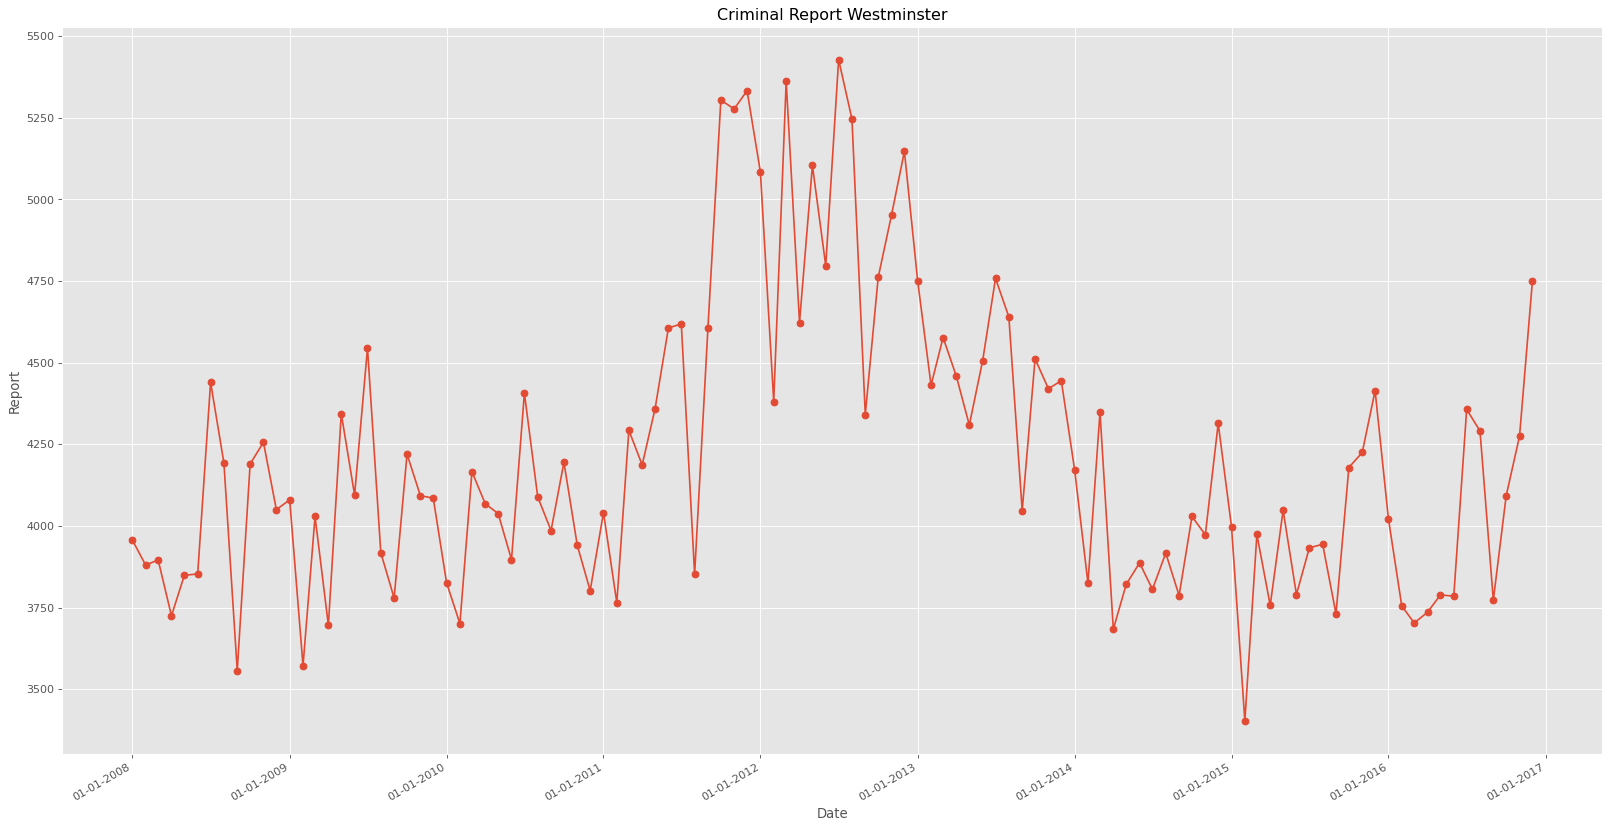

In [42]:
# membuat Scatter plot

import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from matplotlib import dates as mpl_dates

from matplotlib.pyplot import figure

figure(figsize=(20, 10), dpi=80)

plt.plot_date(x, y, linestyle='solid')
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.tight_layout()
plt.title('Criminal Report Westminster')
plt.xlabel('Date')
plt.ylabel('Report')


plt.figsize=(20, 10)
plt.show()

Apakah data Kasus kriminal di London ini termasuk Time Series data?

Pada gambar Box plot diatas dapat kita lihat dari tahun 2008 sampai 2011 memiliki grafik yang stabil. Lalu tahun berikutnya sampai ke tahun 2014 terjadi lonjakan kasus sekitar 50% dari tahun-tahun sebelumnya. Lalu kembali stabil dikisaran +-40000 kasus sampai tahun 2017. Lalu kemudian terjadi lagi lonjakan di akhir tahun 2017 yg sepertinya akan terjadi lonjakan yang signifikan lagi seperti di tahun 2012-2014. Gambar graphic seperti ini kemungkinan adalah time series seasonal.

### Word Clouds

In [43]:
# Transpose datafram pivoted untuk memudahkan visualisasi
pivoted = pivoted.transpose()

In [44]:
# Membuat variabel total 
pivoted['Total'] = pivoted.sum(axis=1)

In [45]:
pivoted.head() # Menampilkan 5 data teratas

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
Barking and Dagenham,17656,17713,17130,16686,15990,15759,15426,16346,16741,149447
Barnet,23944,23449,23416,24007,23573,22510,22572,24036,24684,212191
Bexley,15305,14445,13166,11325,11669,11552,11844,11990,12840,114136
Brent,23504,24748,25512,27669,26357,23759,24426,24883,26693,227551
Bromley,24015,21858,19572,19868,19622,18945,19668,20637,20164,184349


In [46]:
# Menjumlahkan semua nilai values di kolom Total
total_value = pivoted['Total'].sum()
total_value

6447758

In [47]:
# Membuat string dari kolom borough dan total untuk bisa dijadikan ke word cloud nantinya
max_words = 90
word_string = ''
for country in pivoted.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(pivoted.loc[country,'Total']/float(total_value)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# display the generated text
word_string

'Barnet Barnet Bexley Brent Brent Brent Bromley Bromley Camden Camden Camden Croydon Croydon Croydon Ealing Ealing Ealing Enfield Enfield Greenwich Greenwich Hackney Hackney Hackney Haringey Haringey Harrow Havering Hillingdon Hillingdon Hounslow Hounslow Islington Islington Islington Lambeth Lambeth Lambeth Lambeth Lewisham Lewisham Lewisham Merton Newham Newham Newham Redbridge Redbridge Southwark Southwark Southwark Sutton Wandsworth Wandsworth Westminster Westminster Westminster Westminster Westminster Westminster '

In [48]:
# import library yang diperlukan untuk word cloud
from wordcloud import WordCloud
# create the word cloud
wordcloud = WordCloud(background_color='white').generate(word_string)

print('Word cloud created!')

Word cloud created!


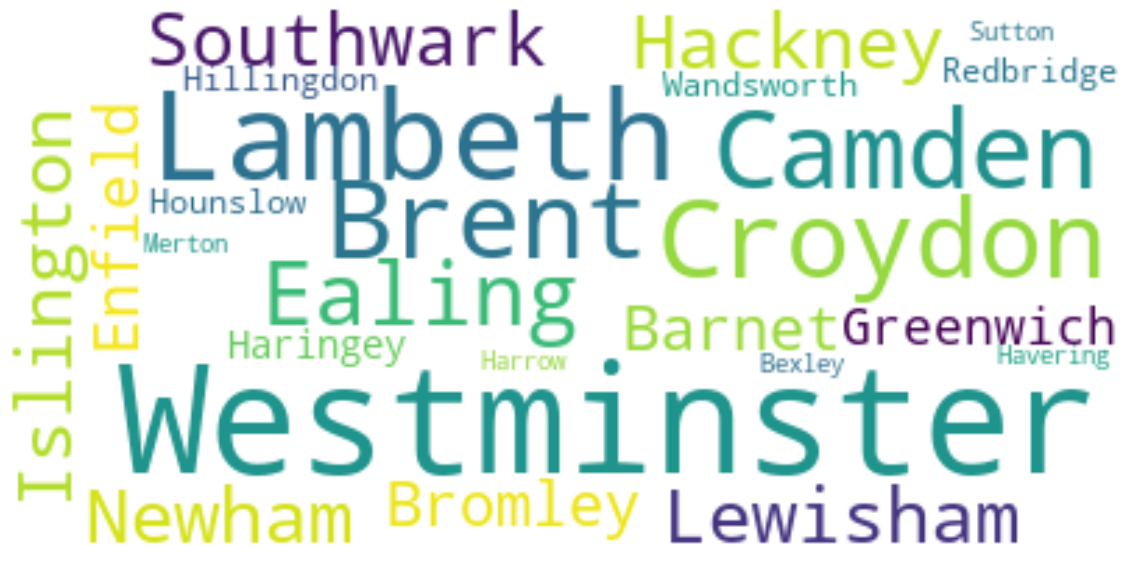

In [49]:
# display the cloud
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(25)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Daerah apa yang memiliki report criminal terbanyak di London?

Pada word cloud diatas dapat kita simpulkan bahwa kota dengan report criminal terbanyak adalah daerah Westminster. Lalu diikuti daerah Lambeth, Camden, Croydon, dan Brent. Dan daerah dengan laporan kriminal paling sedikit adalah Bexley, diikuti oleh Haverin, Sutton, Merton, dan Harrow

### Folium Maps

In [50]:
# import library yang diperlukan untuk Cloropleth Map

import folium
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import geojson as gj
import plotly.express as px
import json
import urllib.request
import requests
from urllib.request import urlopen

from IPython.display import display

plt.style.use('fivethirtyeight')
mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['lines.color'] = 'r'

In [51]:
# Membuat Cloropleth map

print("Crime rate in boroughs of london")
print("please zoom in to view the map")
df2=df[['borough','value']]
world_geo = r'https://raw.githubusercontent.com/radoi90/housequest-data/master/london_boroughs.geojson' 
world_map=folium.Map(location=[51.513176, -0.125510],zoom_start=10)

world_map.choropleth(
    geo_data=world_geo,
    name='choropleth',
    data=df2,
    columns=['borough', 'value'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime rate in boroughs of london'
    
)

#folium.LayerControl().add_to(world_map)
world_map.save('LondonCrime.html')
display(world_map)

Crime rate in boroughs of london
please zoom in to view the map


C:\Users\naufa\Anaconda3\lib\site-packages\folium\folium.py:413: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


Bagaimana keadaan geografis dari daerah yang memiliki kasus kriminal terbanyak di London?

Dari Map Cloropleth diatas kita dapat dengan mudah melihat wilayah2 mana saja yang memiliki kasus kriminal terbanyak. Semakin merah wilayah tersebut maka kasus yang terjadi diwilayah itu banyak. Dan begitu juga sebaliknya untuk indikator kuning yang menandakan kasus kriminal sedikit. Dari peta diatas wilayak dengan report terbanyak adalah Westminster. Berdasarkan peta diatas Wensminster terletak di pusat kota London. Ini mungkin menjadi salah satu penyebab kasus kriminal disana banyak.

### Conclusion

Dari Visualisasi diatas dapat disimpulkan bahwa, Daerah di London yang memiliki kasus tertinggi adalah Westminster dan termasuk kasus yang beda jauh dengan kota lainnya. Lalu diikuti daerah Lambeth dan Southwark. Saat menggunaka scatter plot dapat dilihat bahwa data report criminal di daerah Weismenster adalah kemungkina Time Series Seasonal. Lalu Kasus kejahatan yang paling sering terjadi di kota London adalah Sexual Offence, Violence against the person, dan Robbery. Tindakan criminal di London yang paling jarang dilakukan adalah Theft from Motorcycle, Burglary in dwelling, dan Harassment. Dari peta Cloropleth wilayah dengan report terbanyak adalah Westminster. Berdasarkan peta diatas Wensminster terletak di pusat kota London. Ini mungkin menjadi salah satu penyebab kasus kriminal disana banyak karena di pusat kota merupakan daerah padat penduduk.